In [1]:
import pandas as pd

In [4]:
df=pd.read_csv('merged_training_dataset.csv')

In [5]:
df

,patient_id,hotspot_recency_norm,age,hot_spotter_chronic_flag,chronic_x_readmission,hot_spotter_readmission_flag,elderly_flag,num_inpatient_visits,num_follow_ups,inpatient_visit_ratio,...,subtype_COLORECTAL CANCER,subtype_DIABETES,subtype_HYPERTENSION,count_msrmnt_type,care_duration_days,msrmnt_type_diversity,msrmnt_subtype_diversity,days_until_next_care,weighted_care_score,risk_score
0,291,0.805921,56,0,0,0,0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.51
1,306,0.000000,42,0,0,0,0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.61
2,310,0.805921,71,0,0,0,0,1.0,1.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.70
3,315,0.000000,49,0,0,0,0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.65
4,318,0.000000,25,0,0,0,0,1.0,1.0,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,82117,0.000000,45,0,0,0,0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.49
7996,82120,0.000000,12,0,0,0,0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.19
7997,82130,0.000000,49,0,0,0,0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.62
7998,82152,0.000000,54,0,0,0,0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.88


In [6]:
df.columns

Index(['patient_id', 'hotspot_recency_norm', 'age', 'hot_spotter_chronic_flag',
       'chronic_x_readmission', 'hot_spotter_readmission_flag', 'elderly_flag',
       'num_inpatient_visits', 'num_follow_ups', 'inpatient_visit_ratio',
       'num_visits', 'followup_ratio', 'num_er_visits',
       'days_between_first_last_visit', 'er_visit_ratio',
       'visit_frequency_per_month', 'num_chronic_conditions', 'cond_CANCER',
       'has_cancer_history', 'diabetes_count', 'chronic_condition_ratio',
       'cancer_count', 'diabetes_count.1', 'hypertension_count',
       'num_care_events', 'last_care_dt', 'num_care_gaps', 'has_next_care',
       'has_last_care', 'type_MEDICATION ADHERENCE', 'type_SCREENING',
       'subtype_BREAST CANCER', 'subtype_CHOLESTEROL',
       'subtype_COLORECTAL CANCER', 'subtype_DIABETES', 'subtype_HYPERTENSION',
       'count_msrmnt_type', 'care_duration_days', 'msrmnt_type_diversity',
       'msrmnt_subtype_diversity', 'days_until_next_care',
       'weighted_car

✅ Dataset loaded: (8000, 43)
✅ Cleaned dataframe shape: (8000, 43)
✅ Added 5 interaction features → new shape: (8000, 48)
Train: (6400, 46), Test: (1600, 46)
✅ Linear Regression    | R²: 0.4365 | MAE: 0.8471 | MSE: 3.4312
✅ Ridge Regression     | R²: 0.4364 | MAE: 0.8470 | MSE: 3.4316
✅ Lasso Regression     | R²: 0.1303 | MAE: 1.2059 | MSE: 5.2957
✅ Decision Tree        | R²: 0.0479 | MAE: 0.9748 | MSE: 5.7973
✅ Random Forest        | R²: 0.4142 | MAE: 0.8467 | MSE: 3.5671
✅ Extra Trees          | R²: 0.4243 | MAE: 0.8618 | MSE: 3.5053
🔍 Tuning Gradient Boosting ...
✅ Best params for Gradient Boosting: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}
✅ Gradient Boosting    | R²: 0.3868 | MAE: 0.8194 | MSE: 3.7334
🔍 Tuning XGBoost ...
✅ Best params for XGBoost: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300, 'subsample': 0.8}
✅ XGBoost              | R²: 0.3971 | MAE: 0.8336 | MSE: 3.6708
🔍 Tuning LightGBM ...
[LightGBM] [Info] Auto-choosing row-wise multi-thread

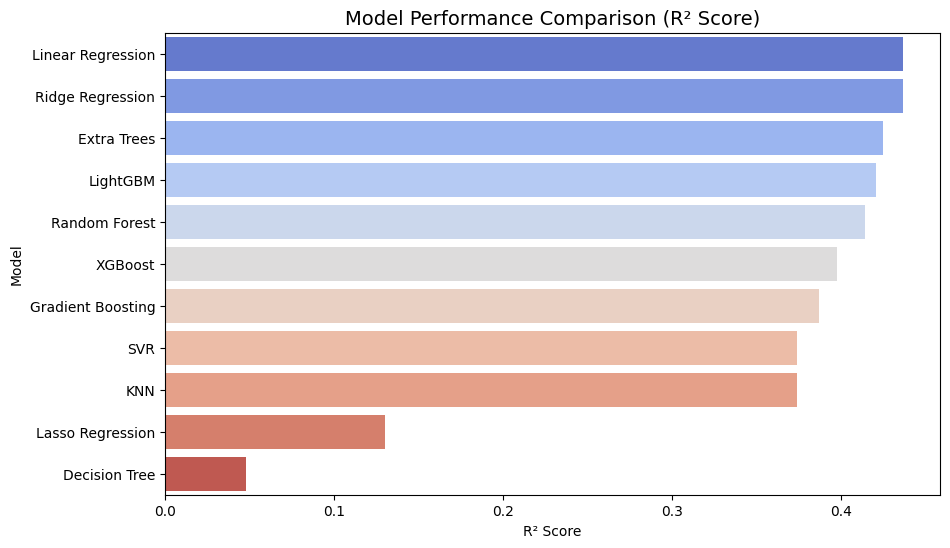

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

df = pd.read_csv("merged_dataset.csv")
print(f" Dataset loaded: {df.shape}")

for col in df.columns:
    if df[col].dtype == 'object':
        # Standardize text
        df[col] = df[col].astype(str).str.strip().str.lower()
        # Convert boolean-like strings
        df[col] = df[col].replace({
            'true': 1, 'false': 0,
            'yes': 1, 'no': 0,
            'y': 1, 'n': 0
        })

        try:
            df[col] = pd.to_numeric(df[col])
        except ValueError:
            print(f"Dropping non-numeric column: {col}")
            df = df.drop(columns=[col])

print(f"✅ Cleaned dataframe shape: {df.shape}")


def safe_divide(a, b):
    return np.where(b == 0, 0, a / (b + 1e-6))

df["care_per_visit"] = safe_divide(df.get("num_care_events", 0), df.get("num_visits", 1))
df["chronic_age_interaction"] = df.get("num_chronic_conditions", 0) * df.get("age", 0)
df["visit_per_chronic"] = safe_divide(df.get("num_visits", 0), df.get("num_chronic_conditions", 1))
df["care_gap_ratio"] = safe_divide(df.get("num_care_gaps", 0), df.get("num_care_events", 1))
df["chronic_ratio_squared"] = df.get("chronic_condition_ratio", 0) ** 2

print(f"Added 5 interaction features → new shape: {df.shape}")

X = df.drop(columns=["risk_score", "patient_id"], errors="ignore")
y = df["risk_score"]

X = X.fillna(X.median())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(f"Train: {X_train.shape}, Test: {X_test.shape}")

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Extra Trees": ExtraTreesRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, verbosity=0),
    "LightGBM": LGBMRegressor(random_state=42),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor()
}

param_grids = {
    "Gradient Boosting": {
        "n_estimators": [200, 400],
        "learning_rate": [0.03, 0.05, 0.1],
        "max_depth": [3, 5, 7]
    },
    "XGBoost": {
        "n_estimators": [300, 500],
        "learning_rate": [0.03, 0.05, 0.1],
        "max_depth": [4, 6, 8],
        "subsample": [0.8, 1.0]
    },
    "LightGBM": {
        "n_estimators": [300, 500],
        "learning_rate": [0.03, 0.05, 0.1],
        "num_leaves": [31, 50, 70]
    }
}

results = []

for name, model in models.items():
    if name in param_grids: 
        print(f"Tuning {name} ...")
        grid = GridSearchCV(model, param_grids[name], cv=3, scoring="r2", n_jobs=-1)
        grid.fit(X_train, y_train)
        best_model = grid.best_estimator_
        print(f"Best params for {name}: {grid.best_params_}")
    else:
        best_model = model.fit(X_train, y_train)
    

    y_pred = best_model.predict(X_test)
    
    # Metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    results.append([name, r2, mae, mse])
    print(f"{name:20s} | R²: {r2:.4f} | MAE: {mae:.4f} | MSE: {mse:.4f}")

results_df = pd.DataFrame(results, columns=["Model", "R²", "MAE", "MSE"])
results_df = results_df.sort_values(by="R²", ascending=False).reset_index(drop=True)

print("\n Model Comparison:\n")
print(results_df)

plt.figure(figsize=(10,6))
sns.barplot(data=results_df, x="R²", y="Model", palette="coolwarm")
plt.title("Model Performance Comparison (R² Score)", fontsize=14)
plt.xlabel("R² Score")
plt.ylabel("Model")
plt.show()
